## Fashion MNIST - CNN v1
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

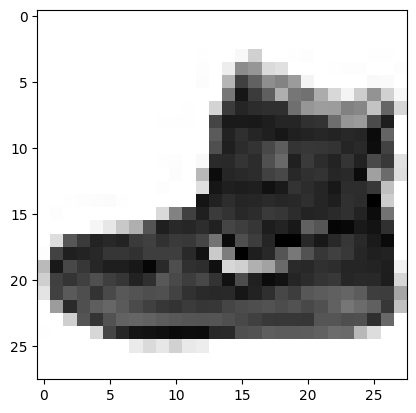

In [3]:
plt.imshow(X_train[0], cmap='Greys');

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

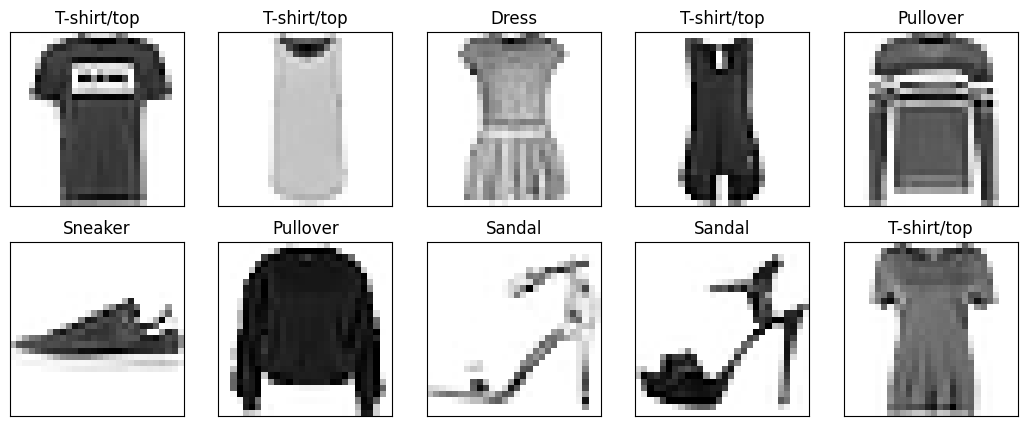

In [5]:
plt.figure(figsize=(13,5))
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
# X data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.

In [7]:
# y data
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [10]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
!mkdir models
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Nov  8 03:02 models
drwxr-xr-x 1 root root 4096 Nov  6 14:20 sample_data


In [12]:
model_path = 'models/best-fashion-mnist-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=256,
    callbacks=[mc, es]
)

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.8163
Epoch 1: val_loss improved from inf to 0.33521, saving model to models/best-fashion-mnist-v1.h5
188/188 [==============================] - 15s 21ms/step - loss: 0.5131 - accuracy: 0.8163 - val_loss: 0.3352 - val_accuracy: 0.8788
Epoch 2/100
  5/188 [..............................] - ETA: 2s - loss: 0.3446 - accuracy: 0.8766

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - ETA: 0s - loss: 0.3208 - accuracy: 0.8846
Epoch 2: val_loss improved from 0.33521 to 0.28391, saving model to models/best-fashion-mnist-v1.h5
188/188 [==============================] - 3s 17ms/step - loss: 0.3208 - accuracy: 0.8846 - val_loss: 0.2839 - val_accuracy: 0.8952
Epoch 3/100
186/188 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.9023
Epoch 3: val_loss improved from 0.28391 to 0.24832, saving model to models/best-fashion-mnist-v1.h5
188/188 [==============================] - 3s 18ms/step - loss: 0.2698 - accuracy: 0.9024 - val_loss: 0.2483 - val_accuracy: 0.9101
Epoch 4/100
187/188 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.9126
Epoch 4: val_loss improved from 0.24832 to 0.23540, saving model to models/best-fashion-mnist-v1.h5
188/188 [==============================] - 3s 18ms/step - loss: 0.2380 - accuracy: 0.9126 - val_loss: 0.2354 - val_accuracy: 0.9149
Epoch 5/100
188/188 [====

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2227 - accuracy: 0.9210


[0.22273972630500793, 0.9210000038146973]